# Assignment #5 - Deep Learning

### <font color="red"> DUE: Apr 23 (Tuesday) 11:00 pm </font>  

<font color="blue"> Sai Supreeth Segu </font>

# I. Overview

Describe the objective of this assignment. You can briefly state how you accompilsh it.

- In this assignment, I am going to learn about different types of deep neural networks and how can we use deep neural networks for different problems.
- This assignment mainly deals with libraries TensorFlow and Keras. 
- I will learn how to feed the data into deep neural network and how to implement a deep neural network.
- I will learn how to do parameter tunning for the given deep neural network.
- Also we will learn about the architecture of the model and which will be more suitable strucure(architecture) after parameter tunning
- I will also learn about what type of deep neural network we need to use depending on the type of data

# II. Data

Introduce your data and visualize them. Describe your observations about the data.
You can reuse the data that you examined in Assignment #0 (of course for classification). 

## Description

* The analysis is performed for different sets of input value for finding the instability in electric grid.  
* Several input values are kept the same: averaging time: 2 s; coupling strength: 8 s^-2; damping: 0.1 s^-1.
* There are 11 predictive attributes, 1 non-predictive(p1), 2 goal fields(stab and stabf) 
* Tau[x] is the reaction time of participant. The value is real from the range [0.5,10]s. 
* p[x] is the nominal power consumed(negative)/produced(positive)(real). 
* For consumers from the range [-0.5,-2]s^-2; p1 = abs(p2 + p3 + p4) 
* g[x] is the coefficient(gamma) proportional to price elasticity. The value of it is real from the range [0.05,1]s^-1.
* stab is the maximal real part of the characteristic equation root. 
* If the value of it is positive then the system is linearly unstable else it is unstable. 
* stabf is the stability label of the system and is categorical into stable or unstable. 

## Reading the Classification Dataset

In [1]:
import pandas as pd
fc = pd.read_csv("Data_for_UCI_named.csv")
fc.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


## Normalizing the Classification Dataset

In [2]:
for i in range(13):
    max_ = fc.iloc[:,i].max();
    min_ = fc.iloc[:,i].min();
    fc.iloc[:,i] = fc.iloc[:,i].apply(lambda x: ((x-min_)/(max_-min_)))
fc.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,0.258801,0.271561,0.829616,0.976978,0.509244,0.811642,0.495075,0.184572,0.632098,0.852229,0.881531,0.955894,0.715740,unstable
1,0.926793,0.463424,0.268117,0.091471,0.813957,0.039894,0.084809,0.496642,0.382588,0.855215,0.539078,0.770323,0.393359,stable
2,0.891799,0.878795,0.268005,0.075171,0.425652,0.528367,0.481864,0.719670,0.118990,0.754440,0.831000,0.062980,0.442940,unstable
3,0.022700,0.754704,0.419623,0.193715,0.556118,0.648372,0.040670,0.668412,0.417084,0.975576,0.925677,0.329181,0.576507,unstable
4,0.277230,0.748301,0.467747,0.985065,0.453830,0.582991,0.102655,0.963811,0.786481,0.426782,0.638883,0.811553,0.686885,unstable


## Preprocessing the Classification Dataset

### Checking for Null values

In [3]:
import numpy as np
np.any(fc.isnull())

tau1     False
tau2     False
tau3     False
tau4     False
p1       False
p2       False
p3       False
p4       False
g1       False
g2       False
g3       False
g4       False
stab     False
stabf    False
dtype: bool

### Checking for Missing Values

In [4]:
np.any(fc.isna())

tau1     False
tau2     False
tau3     False
tau4     False
p1       False
p2       False
p3       False
p4       False
g1       False
g2       False
g3       False
g4       False
stab     False
stabf    False
dtype: bool

In [5]:
fc.describe()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.499986,0.500001,0.499988,0.500004,0.506188,0.499999,0.500006,0.499984,0.500028,0.500002,0.499982,0.500022,0.507411
std,0.288730,0.288699,0.288730,0.288721,0.175663,0.288732,0.288715,0.288709,0.288712,0.288722,0.288711,0.288719,0.194144
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.249940,0.250008,0.250007,0.249972,0.382012,0.250029,0.249968,0.249994,0.250032,0.250027,0.249977,0.249990,0.342879
50%,0.499987,0.499999,0.499985,0.499976,0.506428,0.500022,0.500023,0.499979,0.500038,0.500005,0.499997,0.500024,0.514830
75%,0.749988,0.749998,0.750017,0.750014,0.630532,0.750051,0.749998,0.749957,0.749979,0.750020,0.749937,0.749977,0.660687
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Visualizing the Classification dataset

In [6]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(19,24))
for i in range(13):
    j = 2*i
    plt.subplot(7, 4, j+1)
    plt.plot(fc[fc.iloc[:,13]=='stable'].iloc[:250,i])
    plt.title("Line graph of stable class")
    plt.ylabel(fc.columns.values[i])
    plt.xlabel("Records")
    fig.tight_layout()
    plt.subplot(7, 4, j+2)
    plt.plot(fc[fc.iloc[:,13]=='unstable'].iloc[:250,i],color = 'orange')
    plt.title("histogram of unstable class")
    plt.ylabel(fc.columns.values[i])
    plt.xlabel("Records")
    fig.tight_layout()

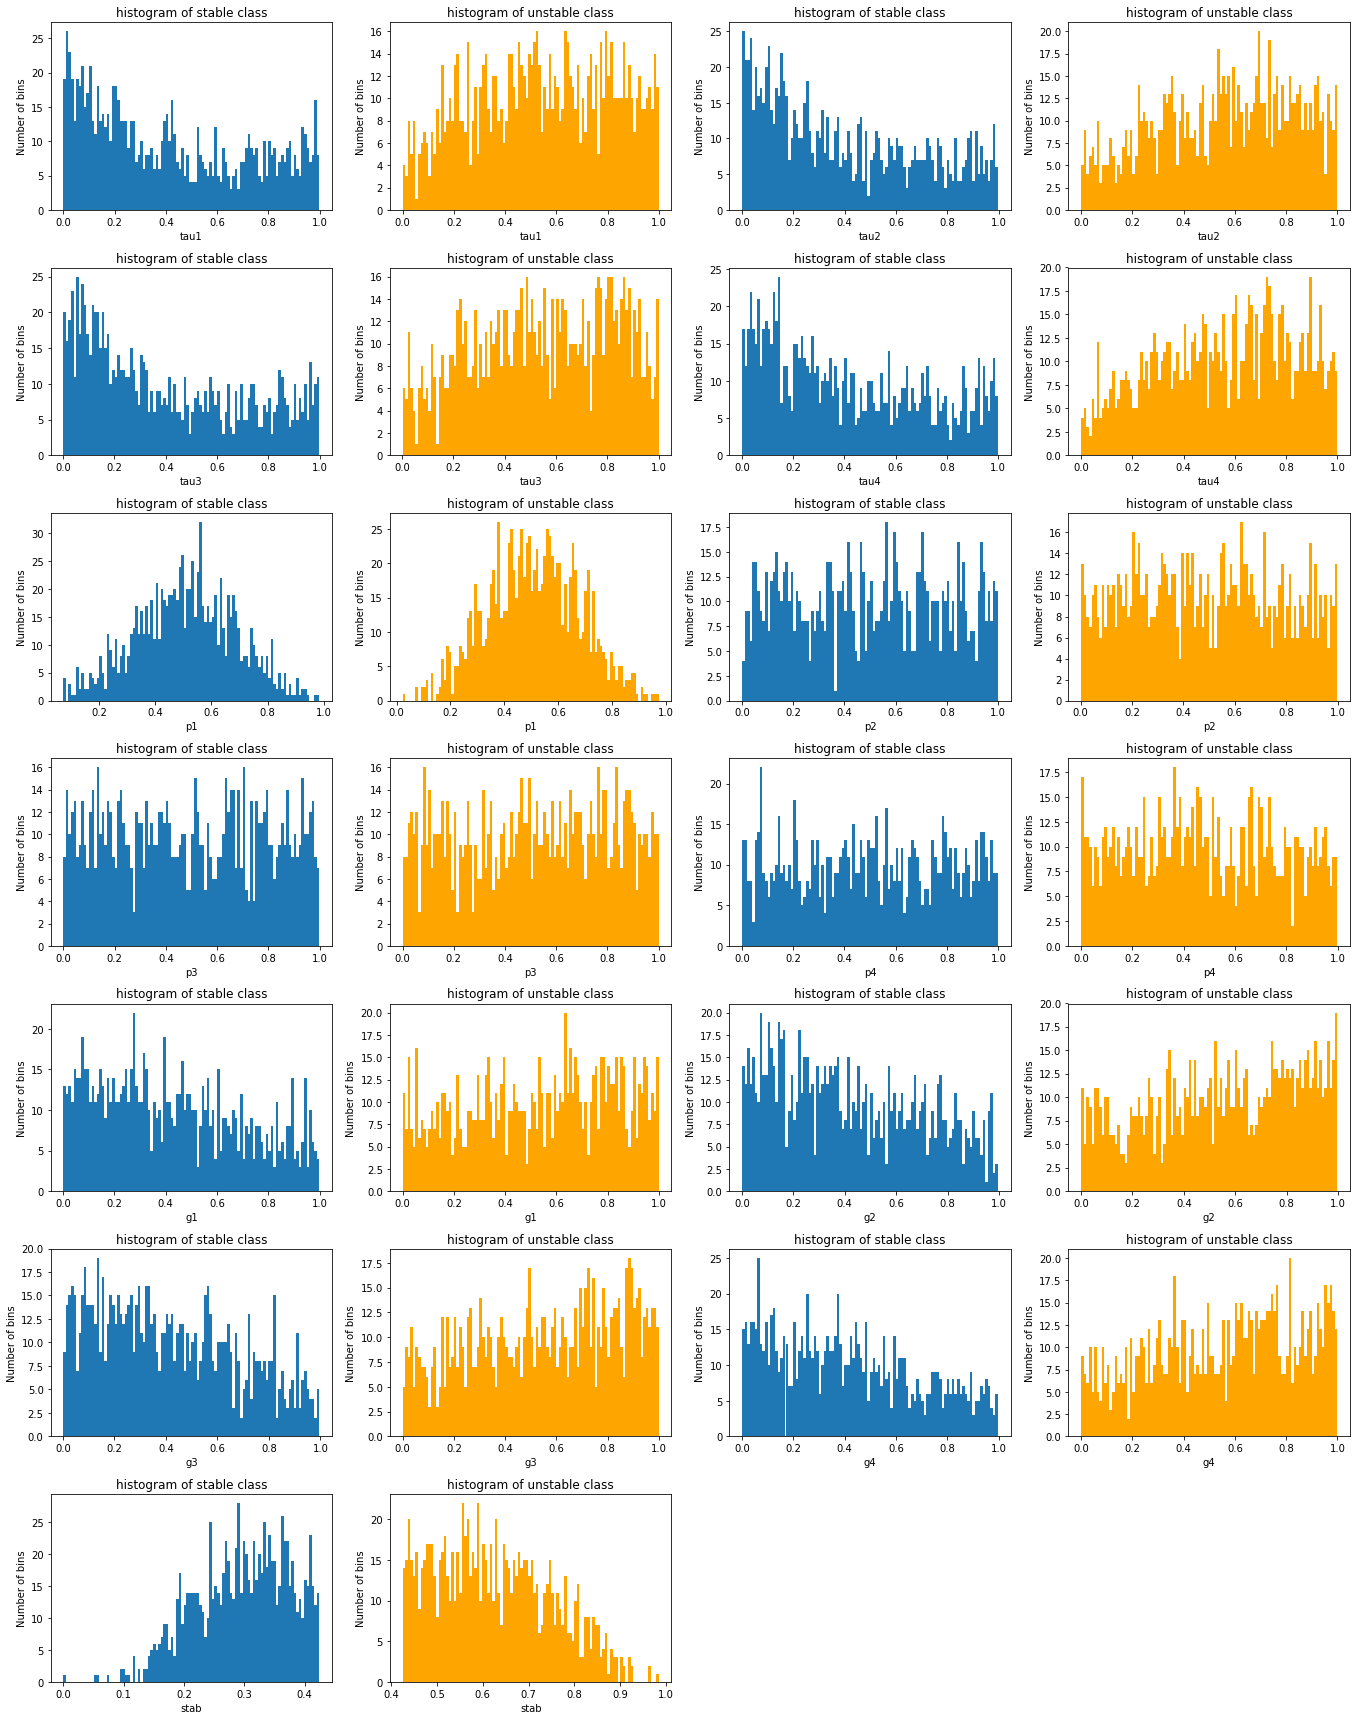

In [7]:
fig = plt.figure(figsize=(19,24))
for i in range(13):
    j = 2*i
    plt.subplot(7, 4, j+1)
    plt.hist(fc[fc.iloc[:,13]=='stable'].iloc[:1000,i],100)
    plt.title("histogram of stable class")
    plt.xlabel(fc.columns.values[i])
    plt.ylabel("Number of bins")
    fig.tight_layout()
    plt.subplot(7, 4, j+2)
    plt.hist(fc[fc.iloc[:,13]=='unstable'].iloc[:1000,i],100,color = 'orange')
    plt.title("histogram of unstable class")
    plt.xlabel(fc.columns.values[i])
    plt.ylabel("Number of bins")
    fig.tight_layout()

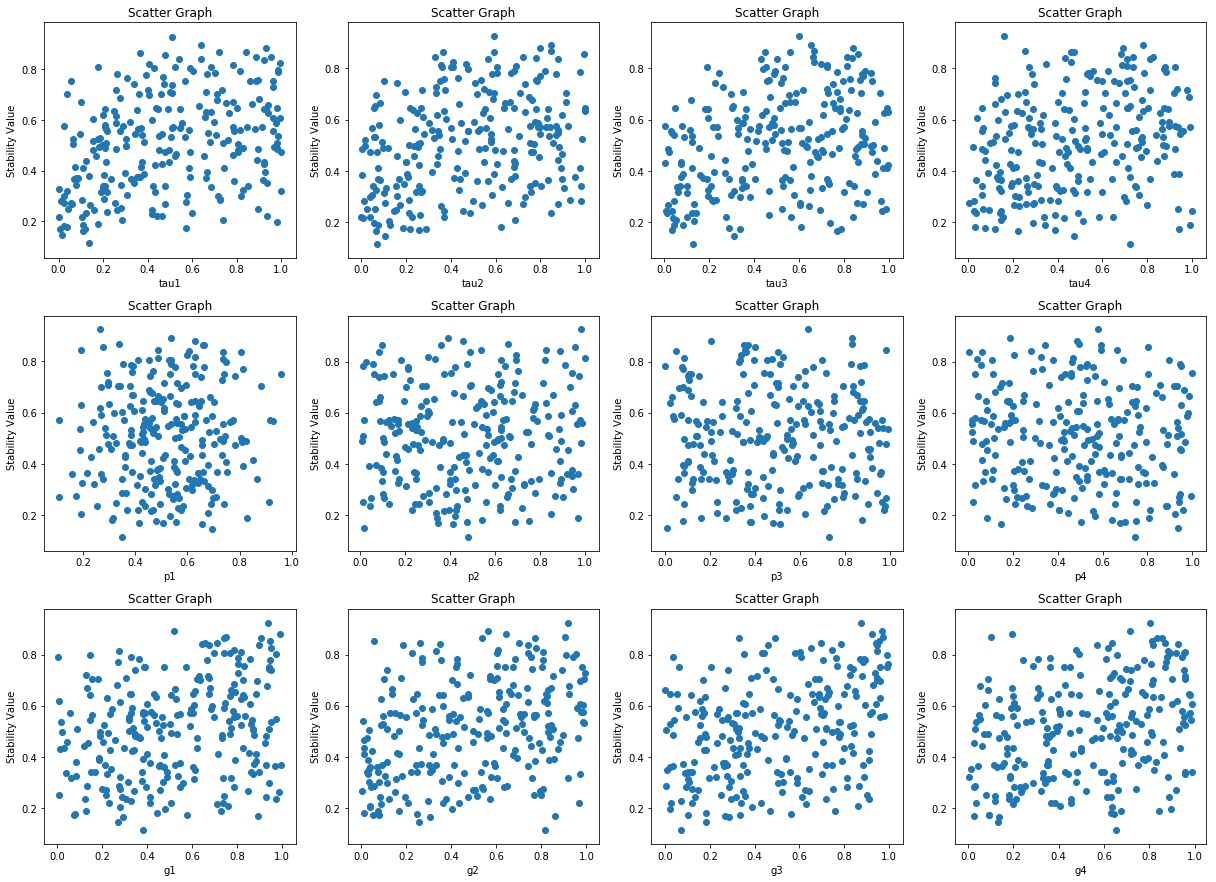

In [8]:
fig = plt.figure(figsize=(17,16))
for i in range(12):
    plt.subplot(4, 4, i+1)
    plt.scatter(fc.iloc[:250,i], fc.iloc[:250,12])
    plt.title("Scatter Graph")
    plt.xlabel(fc.columns.values[i])
    plt.ylabel("Stability Value")
    fig.tight_layout()

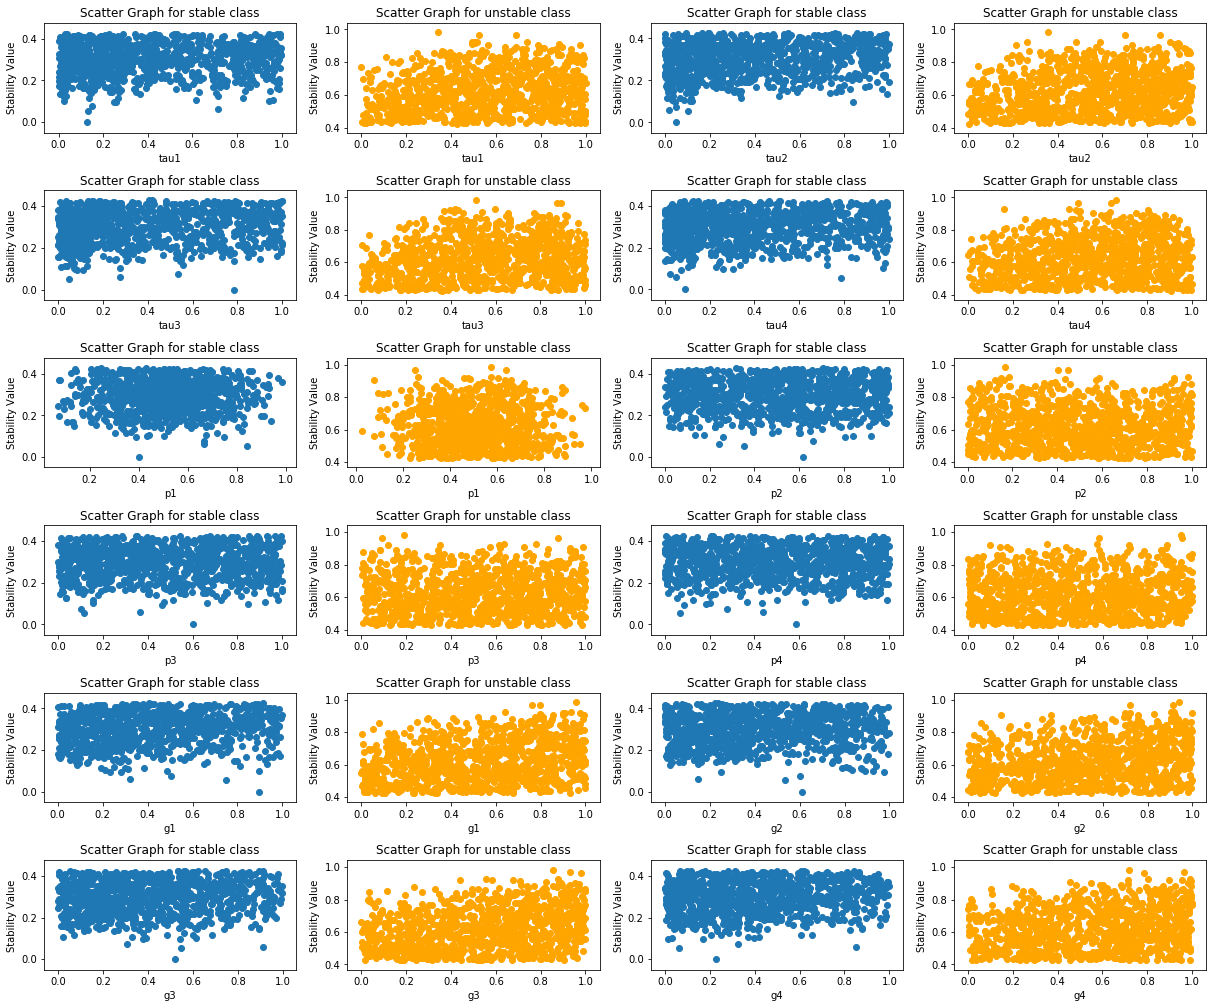

In [9]:
fig = plt.figure(figsize=(17,16))
for i in range(12):
    j = 2*i
    plt.subplot(7, 4, j+1)
    plt.scatter(fc[fc.iloc[:,13]=='stable'].iloc[:1000,i], fc[fc.iloc[:,13]=='stable'].iloc[:1000,12]) 
    plt.title("Scatter Graph for stable class")
    plt.xlabel(fc.columns.values[i])
    plt.ylabel("Stability Value")
    fig.tight_layout()
    plt.subplot(7, 4, j+2)
    plt.scatter(fc[fc.iloc[:,13]=='unstable'].iloc[:1000,i],fc[fc.iloc[:,13]=='unstable'].iloc[:1000,12],color = 'orange')
    plt.title("Scatter Graph for unstable class")
    plt.xlabel(fc.columns.values[i])
    plt.ylabel("Stability Value")
    fig.tight_layout()

## Preliminary observation

* As discussed above, there are no null and missing values. So, data is preprocessed well.
* From the plot of histogram, we can clearly observe that for the attributes other than p1,p2,p3,p4 the graph is nearly opposite for stable and unstable class. To explain this clearly, Suppose if we take the value of tau1 parameter between(0,0.1) then number of values in stable class is way more than the unstable. It is nearly opposite graph for stable and unstable.
* If we consider p1,p2,p3,p4 attributes, The graph of stable and unstable classes are similar, so we can give less priority to this feature using regularisation in the feature purpose.
* I have normilized mainly because we can use the activation functions in the future.

In [11]:
def rmse(T,Y):
    assert(T.shape==Y.shape)
    return np.sqrt((1/T.shape[0])*np.sum((Y-T)**2))

In [12]:
fc['stabf'] = fc['stabf'].apply(lambda x: 1 if x=='stable' else 0)

In [17]:
fc.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,0.258801,0.271561,0.829616,0.976978,0.509244,0.811642,0.495075,0.184572,0.632098,0.852229,0.881531,0.955894,0.715740,0
1,0.926793,0.463424,0.268117,0.091471,0.813957,0.039894,0.084809,0.496642,0.382588,0.855215,0.539078,0.770323,0.393359,1
2,0.891799,0.878795,0.268005,0.075171,0.425652,0.528367,0.481864,0.719670,0.118990,0.754440,0.831000,0.062980,0.442940,0
3,0.022700,0.754704,0.419623,0.193715,0.556118,0.648372,0.040670,0.668412,0.417084,0.975576,0.925677,0.329181,0.576507,0
4,0.277230,0.748301,0.467747,0.985065,0.453830,0.582991,0.102655,0.963811,0.786481,0.426782,0.638883,0.811553,0.686885,0


# III. Methods

In this assignment, you are building a deep network with more than 5 layers using TensorFlow. 
Looking at the chart below, get some idea about how you can construct your networks for what problem and why you pick your structure. 

- Pick at least 3 different networks for experiments.
- Summarize the choice of your networks. 
- Explain your TensorFlow (or Keras) codes. 
- Explain how you apply your model to your data. 

Following images are only for you to get some idea. You do not necessarily stick with these. You can come up with your own structure or shape. 

![](https://camo.githubusercontent.com/31e20172e3b7bc5530a6e7c7e7339e8e556d0acc/687474703a2f2f7777772e6173696d6f76696e737469747574652e6f72672f77702d636f6e74656e742f75706c6f6164732f323031362f30392f6e657572616c6e6574776f726b732e706e67)



# Optional

## Support Vector Machine(SVM)

In [19]:
from sklearn.model_selection import train_test_split
train, test, tar_train, tar_test = train_test_split(fc.iloc[:,0:12], fc.iloc[:,-1], test_size=0.2, random_state = 12)

In [14]:
from sklearn.svm import SVC  
svclassifier = SVC(kernel='linear')  
svclassifier.fit(train, tar_train)  

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [15]:
y_pred = svclassifier.predict(test)  

In [18]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(tar_test,y_pred))  
print(classification_report(tar_test,y_pred)) 

[[1113  138]
 [ 240  509]]
              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1251
           1       0.79      0.68      0.73       749

   micro avg       0.81      0.81      0.81      2000
   macro avg       0.80      0.78      0.79      2000
weighted avg       0.81      0.81      0.81      2000



In [34]:
from keras.regularizers import l2
from keras.models import Sequential
from keras.layers import Dense,Activation
from keras import regularizers

model = Sequential()
model.add(Dense(64, activation='relu'))
model.add(Dense(1))
#model.add(Dense(1), kernel_regularizer = regularizers.l2(0.01))
model.add(Activation('linear'))
model.compile(loss='hinge',
              optimizer='adadelta',
              metrics=['accuracy'])
model.fit(train, tar_train)

ValueError: Please provide as model inputs either a single array or a list of arrays. You passed: x=          tau1      tau2      tau3      tau4        p1        p2        p3  \
5951  0.079129  0.294682  0.265388  0.886773  0.442544  0.416894  0.287551   
6630  0.968565  0.926181  0.546268  0.271849  0.573017  0.522717  0.626457   
3240  0.178837  0.323853  0.935431  0.035276  0.148292  0.713607  0.951768   
5942  0.603126  0.377435  0.991496  0.732733  0.487494  0.919770  0.429228   
3789  0.480082  0.776295  0.956561  0.530514  0.514324  0.853273  0.441086   
2307  0.633383  0.093765  0.360539  0.321594  0.420747  0.538651  0.761476   
2966  0.147599  0.248063  0.594013  0.938418  0.473357  0.209903  0.856922   
5658  0.086507  0.011370  0.766990  0.481045  0.280431  0.509616  0.694786   
9568  0.518767  0.356527  0.337305  0.017454  0.394269  0.806602  0.262972   
591   0.840974  0.179238  0.902610  0.709116  0.472561  0.167972  0.748924   
4376  0.917570  0.551443  0.310434  0.601024  0.437729  0.668710  0.592565   
3028  0.103606  0.939901  0.923461  0.573263  0.580224  0.421523  0.010091   
2466  0.190445  0.794259  0.750461  0.337640  0.188147  0.765133  0.934499   
609   0.319742  0.591991  0.409598  0.667349  0.450807  0.444629  0.521557   
9260  0.680761  0.784217  0.491986  0.499453  0.210092  0.985388  0.713980   
9686  0.881684  0.616198  0.617108  0.183286  0.613165  0.472433  0.132174   
4123  0.561170  0.131277  0.711721  0.495296  0.392601  0.435541  0.496290   
8145  0.179972  0.266949  0.898176  0.873928  0.518084  0.884858  0.368704   
1648  0.105093  0.199708  0.786202  0.773749  0.270149  0.839247  0.391387   
5640  0.041536  0.515529  0.847919  0.085115  0.690831  0.175696  0.014020   
1101  0.864470  0.981428  0.947964  0.596205  0.516368  0.511832  0.170069   
6787  0.505295  0.369859  0.875460  0.364449  0.652921  0.428160  0.387668   
7114  0.111644  0.363818  0.647756  0.701286  0.631316  0.207380  0.663481   
7169  0.111017  0.471227  0.517060  0.911723  0.654655  0.692860  0.292131   
3556  0.724981  0.288352  0.907443  0.516157  0.608424  0.559985  0.327003   
5821  0.173380  0.749437  0.002792  0.741236  0.425843  0.355824  0.492756   
91    0.013615  0.104343  0.311203  0.474339  0.695081  0.017718  0.007855   
5311  0.391568  0.097616  0.870564  0.172988  0.111987  0.732952  0.965097   
1850  0.842382  0.249705  0.118737  0.057940  0.337548  0.588299  0.641756   
1363  0.369291  0.624688  0.302838  0.019495  0.591130  0.225341  0.881097   
...        ...       ...       ...       ...       ...       ...       ...   
4848  0.586928  0.628171  0.120105  0.194029  0.618709  0.157359  0.822210   
4510  0.537171  0.675327  0.999859  0.013523  0.286671  0.565290  0.722240   
5805  0.453471  0.518685  0.684464  0.413010  0.610680  0.386637  0.660839   
8777  0.593079  0.353658  0.010264  0.887073  0.446400  0.412614  0.972073   
2683  0.962981  0.426637  0.009176  0.766036  0.364664  0.787889  0.845999   
1158  0.791915  0.771887  0.763746  0.250976  0.702870  0.099643  0.350973   
208   0.281047  0.050278  0.526802  0.193597  0.275999  0.671118  0.769768   
5790  0.552088  0.887321  0.713075  0.446611  0.664731  0.528703  0.002507   
7585  0.500274  0.240880  0.860806  0.387831  0.658999  0.749343  0.195019   
4515  0.912841  0.011632  0.568183  0.087061  0.556574  0.522244  0.446632   
4030  0.952037  0.379255  0.507391  0.099263  0.523728  0.919577  0.184058   
9507  0.179913  0.593943  0.388449  0.504852  0.544934  0.838210  0.402579   
8281  0.429041  0.609636  0.505282  0.309700  0.396977  0.009879  0.952242   
4178  0.620603  0.734465  0.960034  0.706581  0.324632  0.794638  0.459099   
3276  0.707435  0.874022  0.895078  0.262735  0.625240  0.261034  0.622719   
1128  0.805152  0.573252  0.391581  0.352214  0.183748  0.504140  0.975536   
5194  0.598430  0.901855  0.445679  0.843734  0.313246  0.751814  0.703715   
9846  0.090031  0.887822  0.079124  0.015955  0.433500  0.027100  0.772812   
8651  0.776491  0.626785  0.082049  0.664487  0.587453  0.344540  0.890092   
8610  0.517289  0.947969  0.634645  0.201659  0.288223  0.319101  0.863215   
4569  0.707255  0.165054  0.614511  0.045133  0.014076  0.957107  0.984699   
3725  0.967783  0.059646  0.161780  0.684118  0.217451  0.920245  0.998525   
8241  0.661158  0.970490  0.211810  0.038034  0.635940  0.372153  0.398040   
278   0.789457  0.253433  0.391897  0.144050  0.560659  0.219127  0.580488   
9475  0.267907  0.940031  0.836643  0.055162  0.277481  0.527023  0.872578   
3714  0.046442  0.204675  0.753512  0.105738  0.219141  0.988081  0.747790   
7409  0.470416  0.809997  0.361728  0.452867  0.356126  0.400121  0.698213   
3325  0.714372  0.860418  0.218904  0.514540  0.432735  0.111657  0.769133   
9606  0.362284  0.872857  0.690614  0.486106  0.321386  0.468454  0.647941   
5787  0.281586  0.580616  0.929320  0.393459  0.486428  0.442971  0.959791   

            p4        g1        g2        g3        g4  
5951  0.977222  0.571215  0.630405  0.165408  0.371325  
6630  0.160041  0.847996  0.984090  0.667255  0.307072  
3240  0.856341  0.322414  0.327729  0.155409  0.610274  
5942  0.204390  0.020793  0.097614  0.463355  0.391993  
3789  0.182431  0.201472  0.849035  0.466005  0.731597  
2307  0.443783  0.143264  0.274370  0.734173  0.182579  
2966  0.526871  0.084348  0.293926  0.906244  0.148417  
5658  0.940069  0.578312  0.299959  0.570980  0.837915  
9568  0.749935  0.620584  0.602659  0.138557  0.988784  
591   0.679068  0.751548  0.369647  0.117994  0.272524  
4376  0.434163  0.242534  0.419716  0.926586  0.830542  
3028  0.857007  0.135900  0.136791  0.111228  0.107735  
2466  0.708311  0.192676  0.431342  0.596541  0.350245  
609   0.691897  0.395690  0.195115  0.987505  0.373218  
9260  0.645939  0.464299  0.348963  0.959253  0.454767  
9686  0.589982  0.952501  0.281697  0.081090  0.340064  
4123  0.892415  0.520300  0.193011  0.125483  0.625011  
8145  0.212495  0.346439  0.180862  0.406159  0.350825  
1648  0.943209  0.838075  0.095652  0.670063  0.734781  
5640  0.783131  0.904511  0.596184  0.584391  0.938302  
1101  0.789022  0.225070  0.023755  0.034689  0.168796  
6787  0.265270  0.857220  0.316226  0.911487  0.060638  
7114  0.271900  0.882531  0.931050  0.993607  0.997824  
7169  0.091175  0.703140  0.029569  0.010480  0.688630  
3556  0.321145  0.472861  0.797749  0.959063  0.201766  
5821  0.880761  0.051971  0.620002  0.606420  0.704104  
91    0.935127  0.267759  0.259358  0.181018  0.134639  
5311  0.927307  0.255201  0.081072  0.385374  0.728649  
1850  0.751368  0.002061  0.995047  0.151222  0.262508  
1363  0.151050  0.530962  0.647344  0.656877  0.850235  
...        ...       ...       ...       ...       ...  
4848  0.199182  0.066027  0.600402  0.964291  0.274742  
4510  0.839132  0.997918  0.435052  0.424479  0.437803  
5805  0.154211  0.466792  0.507163  0.990147  0.927842  
8777  0.285983  0.247804  0.178195  0.209448  0.034626  
2683  0.270144  0.610744  0.218052  0.624333  0.824753  
1158  0.487862  0.862896  0.150873  0.022181  0.081319  
208   0.716253  0.165435  0.532479  0.101208  0.987237  
5790  0.516171  0.012757  0.905610  0.313238  0.161551  
7585  0.119405  0.593228  0.333291  0.416262  0.961856  
4515  0.387276  0.939194  0.041632  0.604704  0.238678  
4030  0.346309  0.183519  0.140700  0.861614  0.638350  
9507  0.148614  0.923029  0.957356  0.423685  0.654353  
8281  0.849608  0.906080  0.671160  0.530198  0.251078  
4178  0.764569  0.775982  0.311618  0.932487  0.634857  
3276  0.276358  0.824053  0.104844  0.141606  0.953680  
1128  0.940806  0.512840  0.038334  0.388528  0.470893  
5194  0.595283  0.845196  0.402405  0.443452  0.618504  
9846  0.907551  0.465863  0.339530  0.026899  0.842225  
8651  0.033363  0.443042  0.057939  0.075655  0.147634  
8610  0.939898  0.033690  0.159020  0.546641  0.323031  
4569  0.963081  0.272387  0.262232  0.750474  0.621242  
3725  0.405531  0.867332  0.675832  0.610500  0.313451  
8241  0.359376  0.588779  0.073150  0.388277  0.622979  
278   0.544854  0.999145  0.135296  0.127925  0.304294  
9475  0.753297  0.198913  0.309781  0.673091  0.049273  
3714  0.583606  0.920127  0.004483  0.153930  0.476249  
7409  0.830039  0.112650  0.429242  0.616299  0.105250  
3325  0.828861  0.080152  0.659408  0.114975  0.043690  
9606  0.911157  0.635959  0.204647  0.995032  0.328679  
5787  0.153640  0.002336  0.043633  0.527086  0.006219  

[8000 rows x 12 columns]

In [35]:
train.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
5951,0.079129,0.294682,0.265388,0.886773,0.442544,0.416894,0.287551,0.977222,0.571215,0.630405,0.165408,0.371325
6630,0.968565,0.926181,0.546268,0.271849,0.573017,0.522717,0.626457,0.160041,0.847996,0.984090,0.667255,0.307072
3240,0.178837,0.323853,0.935431,0.035276,0.148292,0.713607,0.951768,0.856341,0.322414,0.327729,0.155409,0.610274
5942,0.603126,0.377435,0.991496,0.732733,0.487494,0.919770,0.429228,0.204390,0.020793,0.097614,0.463355,0.391993
3789,0.480082,0.776295,0.956561,0.530514,0.514324,0.853273,0.441086,0.182431,0.201472,0.849035,0.466005,0.731597


## Feed Forwar(FF)

### Parameters

- architecture: [12,64,1]
- optimizer: Adam
- Epochs: 100
- loss: mse

In [61]:
import keras
from keras.models import Sequential
from keras import activations
from keras.layers import Dense,Activation

In [40]:
model4 = Sequential()
model4.add(Dense(64,input_dim=12))
model4.add(Activation('relu'))
model4.add(Dense(1))
model4.add(Activation('sigmoid'))
model4.compile(loss='mse',optimizer='adam')
# Fit the model
model4.fit(train,tar_train, epochs=100, batch_size=32,verbose=4)

Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
Epoch 32/100
Epoch 33/100
Epoch 34/100
Epoch 35/100
Epoch 36/100
Epoch 37/100
Epoch 38/100
Epoch 39/100
Epoch 40/100
Epoch 41/100
Epoch 42/100
Epoch 43/100
Epoch 44/100
Epoch 45/100
Epoch 46/100
Epoch 47/100
Epoch 48/100
Epoch 49/100
Epoch 50/100
Epoch 51/100
Epoch 52/100
Epoch 53/100
Epoch 54/100
Epoch 55/100
Epoch 56/100
Epoch 57/100
Epoch 58/100
Epoch 59/100
Epoch 60/100
Epoch 61/100
Epoch 62/100
Epoch 63/100
Epoch 64/100
Epoch 65/100
Epoch 66/100
Epoch 67/100
Epoch 68/100
Epoch 69/100
Epoch 70/100
Epoch 71/100
Epoch 72/100
Epoch 73/100
Epoch 74/100
Epoch 75/100
Epoch 76/100
Epoch 77/100
Epoch 78

In [82]:
y_pred_train1 = model4.predict(train)  

In [83]:
for i in range(len(y_pred_train1)):
    if y_pred_train1[i] > 0.5:
        y_pred_train1[i] = 1
    else:
        y_pred_train1[i] = 0
print(y_pred_train1)

[[1.]
 [0.]
 [1.]
 ...
 [1.]
 [0.]
 [1.]]


In [45]:
y_pred = model4.predict(test)  

In [84]:
for i in range(len(y_pred)):
    if y_pred[i] > 0.5:
        y_pred[i] = 1
    else:
        y_pred[i] = 0
print(y_pred)

[[0.]
 [0.]
 [0.]
 ...
 [1.]
 [1.]
 [0.]]


In [85]:
print("rmse error for train data",rmse(y_pred_train1,np.atleast_2d(tar_train.values).T))
print("rmse error for test data",rmse(y_pred,np.atleast_2d(tar_test.values).T))

rmse error for train data 0.1781852968120546
rmse error for test data 0.22693611435820435


In [86]:
from sklearn.metrics import classification_report, confusion_matrix 
print("Evaluation of train class:")
print(confusion_matrix(tar_train,y_pred_train1))  
print(classification_report(tar_train,y_pred_train1))
print("Evaluation of test class:")
print(confusion_matrix(tar_test,y_pred))  
print(classification_report(tar_test,y_pred))

Evaluation of train class:
[[5002  127]
 [ 127 2744]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      5129
           1       0.96      0.96      0.96      2871

   micro avg       0.97      0.97      0.97      8000
   macro avg       0.97      0.97      0.97      8000
weighted avg       0.97      0.97      0.97      8000

Evaluation of test class:
[[1202   49]
 [  54  695]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1251
           1       0.93      0.93      0.93       749

   micro avg       0.95      0.95      0.95      2000
   macro avg       0.95      0.94      0.94      2000
weighted avg       0.95      0.95      0.95      2000



In [59]:
model4.predict(train).shape

(8000, 1)

In [57]:
tar_train.shape

(8000,)

## Deep Feed Forward(DFF)

### Parameters

- architecture: [12,32,64,32,16,1]
- optimizer: Adam
- Epochs: 100
- loss: mse

In [63]:
model2 = Sequential()
model2.add(Dense(32,input_dim=12))
model2.add(Activation('relu'))
model2.add(Dense(64))
model2.add(Activation('relu'))
model2.add(Dense(32))
model2.add(Activation('relu'))
model2.add(Dense(16))
model2.add(Activation('relu'))
model2.add(Dense(1))
model2.add(Activation('sigmoid'))
model2.compile(loss='mse',optimizer='adam')
# Fit the model
model2.fit(train,tar_train, epochs=100, batch_size=32,verbose=4)

Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
Epoch 32/100
Epoch 33/100
Epoch 34/100
Epoch 35/100
Epoch 36/100
Epoch 37/100
Epoch 38/100
Epoch 39/100
Epoch 40/100
Epoch 41/100
Epoch 42/100
Epoch 43/100
Epoch 44/100
Epoch 45/100
Epoch 46/100
Epoch 47/100
Epoch 48/100
Epoch 49/100
Epoch 50/100
Epoch 51/100
Epoch 52/100
Epoch 53/100
Epoch 54/100
Epoch 55/100
Epoch 56/100
Epoch 57/100
Epoch 58/100
Epoch 59/100
Epoch 60/100
Epoch 61/100
Epoch 62/100
Epoch 63/100
Epoch 64/100
Epoch 65/100
Epoch 66/100
Epoch 67/100
Epoch 68/100
Epoch 69/100
Epoch 70/100
Epoch 71/100
Epoch 72/100
Epoch 73/100
Epoch 74/100
Epoch 75/100
Epoch 76/100
Epoch 77/100
Epoch 78

In [64]:
y_pred2 = model2.predict(test)  

In [72]:
for i in range(len(y_pred2)):
    if y_pred2[i] > 0.5:
        y_pred2[i] = 1
    else:
        y_pred2[i] = 0
print(y_pred2)

[[0.]
 [0.]
 [1.]
 ...
 [1.]
 [1.]
 [0.]]


In [71]:
y_pred_train2 = model2.predict(train)

In [73]:
for i in range(len(y_pred_train2)):
    if y_pred_train2[i] > 0.5:
        y_pred_train2[i] = 1
    else:
        y_pred_train2[i] = 0
print(y_pred_train2)

[[1.]
 [0.]
 [1.]
 ...
 [1.]
 [0.]
 [1.]]


In [74]:
print("rmse error for train data",rmse(y_pred_train2,np.atleast_2d(tar_train.values).T))
print("rmse error for test data",rmse(y_pred2,np.atleast_2d(tar_test.values).T))

rmse error for train data 0.095524865872714
rmse error for test data 0.19874606914351792


In [76]:
from sklearn.metrics import classification_report, confusion_matrix 
print("Evaluation of train class:")
print(confusion_matrix(tar_train,y_pred_train2))  
print(classification_report(tar_train,y_pred_train2))
print("Evaluation of test class:")
print(confusion_matrix(tar_test,y_pred2))  
print(classification_report(tar_test,y_pred2))

Evaluation of train class:
[[5089   40]
 [  33 2838]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5129
           1       0.99      0.99      0.99      2871

   micro avg       0.99      0.99      0.99      8000
   macro avg       0.99      0.99      0.99      8000
weighted avg       0.99      0.99      0.99      8000

Evaluation of test class:
[[1218   33]
 [  46  703]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1251
           1       0.96      0.94      0.95       749

   micro avg       0.96      0.96      0.96      2000
   macro avg       0.96      0.96      0.96      2000
weighted avg       0.96      0.96      0.96      2000



## Radial Basis Network

### Parameters

- architecture: [12,10,1]
- optimizer: Adam
- Epochs: 100
- loss: binary crossentropy

In [88]:
import random
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, LSTM, RepeatVector, TimeDistributed

In [90]:
model3 = Sequential()
model3.add(Dense(10, input_dim=12, activation='sigmoid'))
#model3.add(Dense(10, activation='sigmoid'))
model3.add(Dense(1, activation='sigmoid'))
 # Compile model
model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [192]:
###############
#search k-mean#
###############
#init kmean
kval = 12
kmean = np.zeros((kval, len(train.iloc[0])))
for i in range(kval):
    for j in range(len(kmean[0])):
        kmean[i,j] = random.uniform(min(train.iloc[:,j]),max(train.iloc[:,j]))

In [194]:
kmean

array([[0.30870704, 0.88105263, 0.45567286, 0.78066299, 0.93310514,
        0.87135086, 0.20000524, 0.56729849, 0.24080507, 0.78905464,
        0.88600596, 0.65353409],
       [0.52639604, 0.47769632, 0.96007788, 0.37598435, 0.89529293,
        0.94697511, 0.73777658, 0.68542164, 0.44344715, 0.43625854,
        0.63462596, 0.98410648],
       [0.16664866, 0.91670827, 0.52043225, 0.13324998, 0.06135683,
        0.69278768, 0.01709851, 0.2848064 , 0.41643536, 0.94689478,
        0.38263383, 0.47405977],
       [0.94386037, 0.27498904, 0.06017999, 0.70179865, 0.53164453,
        0.89873185, 0.88406989, 0.44148902, 0.21350581, 0.36686792,
        0.21136773, 0.59487566],
       [0.56908569, 0.90316647, 0.38289027, 0.09126995, 0.60354482,
        0.93700139, 0.29165361, 0.33348415, 0.38570304, 0.51743881,
        0.9283145 , 0.20286924],
       [0.22495542, 0.7648819 , 0.83737808, 0.68391612, 0.3315123 ,
        0.78384895, 0.92601811, 0.79120638, 0.49037641, 0.81584934,
        0.09217083,

In [195]:
itertot = 40
distmin = np.zeros((len(train)))
for i in range(itertot):
    print('iterasi ke', i)
    for j in range(len(distmin)):
  #determine euclid distance
      distall = np.sum((train.iloc[j:j+1].values - kmean)**2.0, axis=1)**0.5
      distmin[j] = np.argmin(distall)

iterasi ke 0
iterasi ke 1
iterasi ke 2
iterasi ke 3
iterasi ke 4
iterasi ke 5
iterasi ke 6
iterasi ke 7
iterasi ke 8
iterasi ke 9
iterasi ke 10
iterasi ke 11
iterasi ke 12
iterasi ke 13
iterasi ke 14
iterasi ke 15
iterasi ke 16
iterasi ke 17
iterasi ke 18
iterasi ke 19
iterasi ke 20
iterasi ke 21
iterasi ke 22
iterasi ke 23
iterasi ke 24
iterasi ke 25
iterasi ke 26
iterasi ke 27
iterasi ke 28
iterasi ke 29
iterasi ke 30
iterasi ke 31
iterasi ke 32
iterasi ke 33
iterasi ke 34
iterasi ke 35
iterasi ke 36
iterasi ke 37
iterasi ke 38
iterasi ke 39


In [196]:
for j in range(kval):
    clust = []
    for k in range(len(distmin)):
        if distmin[k] == j:
            clust.append(train.iloc[j:j+1].values)
        if len(clust) > 0:
            kmean[j] = np.mean(np.asarray(clust), axis = 0)

In [197]:
sigma = 1.2
def transforminput(param, center):
    newinput = np.zeros((len(param), len(center))).astype('float32')
    for i in range(len(param)):
        for j in range(len(center)):
            newinput[i,j] = np.exp(-(np.sum((param[i] - center[j])**2.0)**0.5) / sigma**2.0)
    return newinput

In [198]:
#tranform our input
newinput = transforminput(train.values, kmean)

In [201]:
model3.fit(newinput, tar_train.values, batch_size=20, epochs=100, verbose=1, shuffle=True)

Epoch 1/100
8000/8000 [==============================] - 1s 101us/step - loss: 0.6772 - acc: 0.5816
Epoch 2/100
8000/8000 [==============================] - 0s 53us/step - loss: 0.6528 - acc: 0.6411
Epoch 3/100
8000/8000 [==============================] - 0s 51us/step - loss: 0.6526 - acc: 0.6411
Epoch 4/100
8000/8000 [==============================] - 0s 51us/step - loss: 0.6526 - acc: 0.6411
Epoch 5/100
8000/8000 [==============================] - 0s 52us/step - loss: 0.6522 - acc: 0.6411
Epoch 6/100
8000/8000 [==============================] - 1s 64us/step - loss: 0.6516 - acc: 0.6411
Epoch 7/100
8000/8000 [==============================] - 0s 52us/step - loss: 0.6515 - acc: 0.6411
Epoch 8/100
8000/8000 [==============================] - 0s 53us/step - loss: 0.6510 - acc: 0.6411
Epoch 9/100
8000/8000 [==============================] - 0s 52us/step - loss: 0.6502 - acc: 0.6411
Epoch 10/100
8000/8000 [==============================] - 1s 67us/step - loss: 0.6492 - acc: 0.6411
Epoch 11

8000/8000 [==============================] - 0s 54us/step - loss: 0.4005 - acc: 0.8114
Epoch 84/100
8000/8000 [==============================] - 0s 57us/step - loss: 0.3998 - acc: 0.8131
Epoch 85/100
8000/8000 [==============================] - 0s 55us/step - loss: 0.3994 - acc: 0.8128
Epoch 86/100
8000/8000 [==============================] - 0s 56us/step - loss: 0.3988 - acc: 0.8100
Epoch 87/100
8000/8000 [==============================] - 0s 60us/step - loss: 0.3977 - acc: 0.8117
Epoch 88/100
8000/8000 [==============================] - 0s 55us/step - loss: 0.3975 - acc: 0.8156
Epoch 89/100
8000/8000 [==============================] - 0s 51us/step - loss: 0.3971 - acc: 0.8134
Epoch 90/100
8000/8000 [==============================] - 0s 57us/step - loss: 0.3965 - acc: 0.8125
Epoch 91/100
8000/8000 [==============================] - 0s 51us/step - loss: 0.3965 - acc: 0.8134
Epoch 92/100
8000/8000 [==============================] - 0s 53us/step - loss: 0.3951 - acc: 0.8161
Epoch 93/100


In [202]:
#transform test data
newinputtest = transforminput(test.values, kmean)

In [204]:
y_pred3 = model3.predict(newinputtest)

In [206]:
for i in range(len(y_pred3)):
    if y_pred3[i] > 0.5:
        y_pred3[i] = 1
    else:
        y_pred3[i] = 0
print(y_pred3)

[[0.]
 [0.]
 [0.]
 ...
 [1.]
 [1.]
 [0.]]


In [207]:
y_pred_train3 = model3.predict(newinput)

In [208]:
for i in range(len(y_pred_train3)):
    if y_pred_train3[i] > 0.5:
        y_pred_train3[i] = 1
    else:
        y_pred_train3[i] = 0
print(y_pred_train3)

[[1.]
 [0.]
 [1.]
 ...
 [1.]
 [0.]
 [1.]]


In [210]:
print("rmse error for train data",rmse(y_pred_train3,np.atleast_2d(tar_train.values).T))
print("rmse error for test data",rmse(y_pred3,np.atleast_2d(tar_test.values).T))

rmse error for train data 0.4289522117905443
rmse error for test data 0.4393176527297759


In [211]:
from sklearn.metrics import classification_report, confusion_matrix 
print("Evaluation of train class:")
print(confusion_matrix(tar_train,y_pred_train3))  
print(classification_report(tar_train,y_pred_train3))
print("Evaluation of test class:")
print(confusion_matrix(tar_test,y_pred3))  
print(classification_report(tar_test,y_pred3))

Evaluation of train class:
[[4520  609]
 [ 863 2008]]
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      5129
           1       0.77      0.70      0.73      2871

   micro avg       0.82      0.82      0.82      8000
   macro avg       0.80      0.79      0.80      8000
weighted avg       0.81      0.82      0.81      8000

Evaluation of test class:
[[1094  157]
 [ 229  520]]
              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1251
           1       0.77      0.69      0.73       749

   micro avg       0.81      0.81      0.81      2000
   macro avg       0.80      0.78      0.79      2000
weighted avg       0.80      0.81      0.80      2000



### Parameters

- architecture: [12,16,32, 32, 16, 1]
- optimizer: Adam
- Epochs: 100

In [212]:
model5 = Sequential()
model5.add(Dense(16,input_dim=12))
model5.add(Activation('relu'))
model5.add(Dense(32))
model5.add(Activation('relu'))
model5.add(Dense(32))
model5.add(Activation('relu'))
model5.add(Dense(16))
model5.add(Activation('relu'))
model5.add(Dense(1))
model5.add(Activation('sigmoid'))
model5.compile(loss='mse',optimizer='adam')
# Fit the model
model5.fit(train,tar_train, epochs=100, batch_size=64,verbose=4)

Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
Epoch 32/100
Epoch 33/100
Epoch 34/100
Epoch 35/100
Epoch 36/100
Epoch 37/100
Epoch 38/100
Epoch 39/100
Epoch 40/100
Epoch 41/100
Epoch 42/100
Epoch 43/100
Epoch 44/100
Epoch 45/100
Epoch 46/100
Epoch 47/100
Epoch 48/100
Epoch 49/100
Epoch 50/100
Epoch 51/100
Epoch 52/100
Epoch 53/100
Epoch 54/100
Epoch 55/100
Epoch 56/100
Epoch 57/100
Epoch 58/100
Epoch 59/100
Epoch 60/100
Epoch 61/100
Epoch 62/100
Epoch 63/100
Epoch 64/100
Epoch 65/100
Epoch 66/100
Epoch 67/100
Epoch 68/100
Epoch 69/100
Epoch 70/100
Epoch 71/100
Epoch 72/100
Epoch 73/100
Epoch 74/100
Epoch 75/100
Epoch 76/100
Epoch 77/100
Epoch 78

In [214]:
y_pred_train5 = model5.predict(train)

In [215]:
y_pred5 = model5.predict(test)

In [216]:
for i in range(len(y_pred5)):
    if y_pred5[i] > 0.5:
        y_pred5[i] = 1
    else:
        y_pred5[i] = 0
print(y_pred5)

[[0.]
 [0.]
 [0.]
 ...
 [1.]
 [1.]
 [0.]]


In [217]:
for i in range(len(y_pred_train5)):
    if y_pred_train5[i] > 0.5:
        y_pred_train5[i] = 1
    else:
        y_pred_train5[i] = 0
print(y_pred_train5)

[[1.]
 [0.]
 [1.]
 ...
 [1.]
 [0.]
 [1.]]


In [218]:
print("rmse error for train data",rmse(y_pred_train5,np.atleast_2d(tar_train.values).T))
print("rmse error for test data",rmse(y_pred5,np.atleast_2d(tar_test.values).T))

rmse error for train data 0.15732132722552272
rmse error for test data 0.23874672772626646


In [219]:
from sklearn.metrics import classification_report, confusion_matrix 
print("Evaluation of train class:")
print(confusion_matrix(tar_train,y_pred_train5))  
print(classification_report(tar_train,y_pred_train5))
print("Evaluation of test class:")
print(confusion_matrix(tar_test,y_pred5))  
print(classification_report(tar_test,y_pred5))

Evaluation of train class:
[[4991  138]
 [  60 2811]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      5129
           1       0.95      0.98      0.97      2871

   micro avg       0.98      0.98      0.98      8000
   macro avg       0.97      0.98      0.97      8000
weighted avg       0.98      0.98      0.98      8000

Evaluation of test class:
[[1183   68]
 [  46  703]]
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      1251
           1       0.91      0.94      0.93       749

   micro avg       0.94      0.94      0.94      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.94      0.94      0.94      2000



### Parameters

- architecture: [12,8,16,8,4,b1]
- optimizer: Adam
- Epochs: 100

In [220]:
model6 = Sequential()
model6.add(Dense(8,input_dim=12))
model6.add(Activation('relu'))
model6.add(Dense(16))
model6.add(Activation('relu'))
model6.add(Dense(8))
model6.add(Activation('relu'))
model6.add(Dense(4))
model6.add(Activation('relu'))
model6.add(Dense(1))
model6.add(Activation('sigmoid'))
model6.compile(loss='mse',optimizer='adam')
# Fit the model
model6.fit(train,tar_train, epochs=100, batch_size=64,verbose=4)

Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
Epoch 32/100
Epoch 33/100
Epoch 34/100
Epoch 35/100
Epoch 36/100
Epoch 37/100
Epoch 38/100
Epoch 39/100
Epoch 40/100
Epoch 41/100
Epoch 42/100
Epoch 43/100
Epoch 44/100
Epoch 45/100
Epoch 46/100
Epoch 47/100
Epoch 48/100
Epoch 49/100
Epoch 50/100
Epoch 51/100
Epoch 52/100
Epoch 53/100
Epoch 54/100
Epoch 55/100
Epoch 56/100
Epoch 57/100
Epoch 58/100
Epoch 59/100
Epoch 60/100
Epoch 61/100
Epoch 62/100
Epoch 63/100
Epoch 64/100
Epoch 65/100
Epoch 66/100
Epoch 67/100
Epoch 68/100
Epoch 69/100
Epoch 70/100
Epoch 71/100
Epoch 72/100
Epoch 73/100
Epoch 74/100
Epoch 75/100
Epoch 76/100
Epoch 77/100
Epoch 78

In [221]:
y_pred_train6 = model6.predict(train)

In [222]:
y_pred6 = model6.predict(test)

In [223]:
for i in range(len(y_pred6)):
    if y_pred6[i] > 0.5:
        y_pred6[i] = 1
    else:
        y_pred6[i] = 0
print(y_pred6)

[[0.]
 [0.]
 [0.]
 ...
 [1.]
 [1.]
 [0.]]


In [224]:
for i in range(len(y_pred_train6)):
    if y_pred_train6[i] > 0.5:
        y_pred_train6[i] = 1
    else:
        y_pred_train6[i] = 0
print(y_pred_train6)

[[1.]
 [0.]
 [1.]
 ...
 [1.]
 [0.]
 [1.]]


In [225]:
print("rmse error for train data",rmse(y_pred_train6,np.atleast_2d(tar_train.values).T))
print("rmse error for test data",rmse(y_pred6,np.atleast_2d(tar_test.values).T))

rmse error for train data 0.2112463017427761
rmse error for test data 0.24186773244895649


In [226]:
from sklearn.metrics import classification_report, confusion_matrix 
print("Evaluation of train class:")
print(confusion_matrix(tar_train,y_pred_train6))  
print(classification_report(tar_train,y_pred_train6))
print("Evaluation of test class:")
print(confusion_matrix(tar_test,y_pred6))  
print(classification_report(tar_test,y_pred6))

Evaluation of train class:
[[4960  169]
 [ 188 2683]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      5129
           1       0.94      0.93      0.94      2871

   micro avg       0.96      0.96      0.96      8000
   macro avg       0.95      0.95      0.95      8000
weighted avg       0.96      0.96      0.96      8000

Evaluation of test class:
[[1196   55]
 [  62  687]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1251
           1       0.93      0.92      0.92       749

   micro avg       0.94      0.94      0.94      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.94      0.94      0.94      2000



## Explanation of the choice for 3 different neural network structures and reason for the selection. (10 points for each) 

### Feed Forward
- Suppose we have a network of perceptrons that we’d like to use to learn to solve some problem. 
- For example, the inputs to the network might be the raw pixel data from a scanned, handwritten image of a digit. And we’d like the network to learn weights and biases so that the output from the network correctly classifies the digit. 
- To see how learning might work, suppose we make a small change in some weight (or bias) in the network. 
- What we’d like is for this small change in weight to cause only a small corresponding change in the output from the network.
- As we’ll see in a moment, this property will make learning possible. But as it occur a small change in weights leads to a big change in output. So using a neuron model like sigmoid can solve this issue. 
- Designing and training a neural network is not much diﬀerent from training any other machine learning model with gradient descent. 
- The largest diﬀerence between the linear models we have seen so far and neural networks is that the nonlinearity of a neural network causes most interesting loss functions to become non-convex.
- This means that neural networks are usually trained by using iterative, gradient-based optimizers that merely drive the cost function to a very low value, rather than the linear equation solvers used to train linear regression models or the convex optimization algorithms with global convergence guarantees used to train logistic regression or SVMs.

### Deep Feed Forward

- Deep-learning networks are distinguished from the more commonplace single-hidden-layer neural networks by their depth; that is, the number of node layers through which data must pass in a multistep process of pattern recognition.
- In deep-learning networks, each layer of nodes trains on a distinct set of features based on the previous layer’s output. The further you advance into the neural net, the more complex the features your nodes can recognize, since they aggregate and recombine features from the previous layer.
- This is known as feature hierarchy, and it is a hierarchy of increasing complexity and abstraction. 
- It makes deep-learning networks capable of handling very large, high-dimensional data sets with billions of parameters that pass through nonlinear functions
- one of the problems deep learning solves best is in processing and clustering the world’s raw, unlabeled media, discerning similarities and anomalies in data that no human has organized in a relational database or ever put a name to.
- Deep-learning networks perform automatic feature extraction without human intervention, unlike most traditional machine-learning algorithms.
- So for extracting more features from the given input data and  fitting to the given data I have selected this Deep Feed Forward

### Radial Basis Network

- In Single Perceptron / Multi-layer Perceptron(MLP), we only have linear separability because they are composed of input and output layers(some hidden layers in MLP)
- For example, AND, OR functions are linearly-separable & XOR function is not linearly separable.
- We atleast need one hidden layer to derive a non-linearity separation.
- Our RBNN what it does is, it transforms the input signal into another form, which can be then feed into the network to get linear separability.
- RBNN is structurally same as perceptron(MLP).
- RBNN is composed of input, hidden, and output layer. RBNN is strictly limited to have exactly one hidden layer. We call this hidden layer as feature vector.
- RBNN increases dimenion of feature vector.
- We apply non-linear transfer function to the feature vector before we go for classification problem.
- When we increase the dimension of the feature vector, the linear separability of feature vector increases.

#### Advantages of using RBNN than the MLP:
- Training in RBNN is faster than in Multi-layer Perceptron (MLP) → takes many interactions in MLP.
- We can easily interpret what is the meaning / function of the each node in hidden layer of the RBNN. This is difficult in MLP.
- (what should be the # of nodes in hidden layer & the # of hidden layers) this parameterization is difficult in MLP. But this is not found in RBNN.

## Explanation of codes for each structure

### Feed Forward

- I have created a object of model using sequential function and then added input layer with dimension of 12 since I have 12 features.
- Then I have added another layer with number of neurons is 64 and activation function as relu using keras add function.
- Then I have output layer with 1 neuron in it and activation function is sigmoid.
- I have taken loss as mean square error, optimizer as adam and number of epochs is 100
- I have trained the model and predicted the values of the class for test data
- If the probability is greater than 1, I am assigning to 1 or else 0.
- Then I am calculating rmse using function defined before and printing confusion matrix and classification report importing from sklearn.

### Deep Feed Forward

- I have created a object of model using sequential function and then added input layer with dimension of 12 since I have 12 features.
- Then I have added another layer with number of neurons is 32 and activation function as relu using keras add function.
- Similarly, I have added layers of 64, 32, 16, 1 and activation function in every layer is relu except the last layer is sigmoid. 
- I have taken loss as mean square error, optimizer as adam and number of epochs is 100
- I have trained the model and predicted the values of the class for test data
- If the probability is greater than 1, I am assigning to 1 or else 0.
- Then I am calculating rmse using function defined before and printing confusion matrix and classification report importing from sklearn.

### Radial Basis Network

- I have created a object of model using sequential function and then added input layer with dimension of 12 since I have 12 features.
- Then I have added another layer with number of neurons is 64 and activation function as relu using keras add function.
- Then I am finding random values between minimum and maximum values for each feature(column)
- Then I am finding euclidean distance for each point in column considering all the points and finding the point with lowest value. Do the above step for each column
- Then I am finding new k-mean if there are more than one point by taking average and then transforming the input based on k-mean. 
- We are normalizing the data based on k-mean.
- I have taken loss as mean square error, optimizer as adam and number of epochs is 100
- I have trained the model and predicted the values of the class for test data
- If the probability is greater than 1, I am assigning to 1 or else 0.
- Then I am calculating rmse using function defined before and printing confusion matrix and classification report importing from sklearn.

## Explanation of experimental codes

- So, I have passed my data to each model and fit it to it.
- I have first normalized the dataand then passed the first 12 columns as train data and stability class as target label.
- For doing experiments with the data, I have changed the length of each layer for the given model and passed into DFF.
- The code for that is similar to DFF except that I have changed the length of layer.
- I have created a object of model using sequential function and then added input layer with dimension of 12 since I have 12 features.
- Then I have added another layer with number of neurons is 16 in one model and 8 in another and activation function as relu using keras add function.
- Similarly, I have added layers of different sizes and activation function in every layer is relu except for the last layer is sigmoid. 

# IV - Results

- Presents the results of applications of your deep networks.
- Visualize the results 
- Discuss about the choice of network structures and performance of it as you change the structures.  
- What do you think about the results? 

### Plots for results 

In [227]:
train_rmse = []
train_rmse.append(rmse(y_pred_train1,np.atleast_2d(tar_train.values).T))
train_rmse.append(rmse(y_pred_train2,np.atleast_2d(tar_train.values).T))
train_rmse.append(rmse(y_pred_train3,np.atleast_2d(tar_train.values).T))
train_rmse.append(rmse(y_pred_train5,np.atleast_2d(tar_train.values).T))
train_rmse.append(rmse(y_pred_train6,np.atleast_2d(tar_train.values).T))

In [229]:
test_rmse = []
test_rmse.append(rmse(y_pred,np.atleast_2d(tar_test.values).T))
test_rmse.append(rmse(y_pred2,np.atleast_2d(tar_test.values).T))
test_rmse.append(rmse(y_pred3,np.atleast_2d(tar_test.values).T))
test_rmse.append(rmse(y_pred5,np.atleast_2d(tar_test.values).T))
test_rmse.append(rmse(y_pred6,np.atleast_2d(tar_test.values).T))

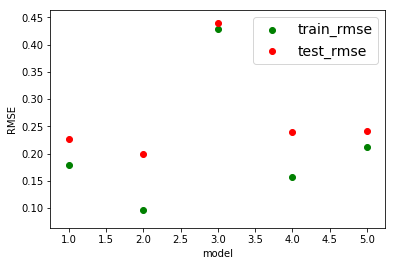

In [232]:
xs = np.arange(1,6)
plt.scatter(xs,train_rmse,c='G',label='train_rmse')
plt.scatter(xs,test_rmse,c='R',label='test_rmse')
plt.xlabel('model')
plt.ylabel('RMSE')
plt.legend(prop={'size':14})

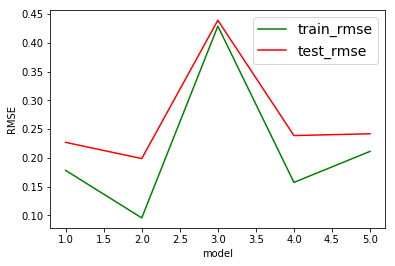

In [233]:
plt.plot(xs,train_rmse,c='G',label='train_rmse')
plt.plot(xs,test_rmse,c='R',label='test_rmse')
plt.xlabel('model')
plt.ylabel('RMSE')
plt.legend(prop={'size':14})

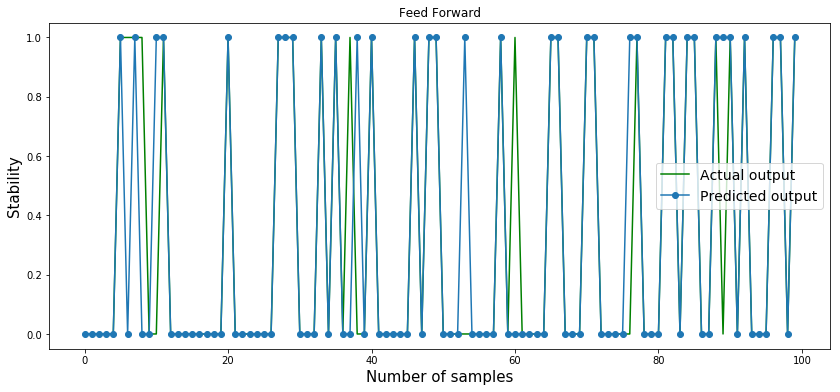

In [236]:
fig = plt.figure(figsize=(14,6))
x = np.arange(100)
plt.plot(x,tar_test[:100],'g-',label='Actual output')
plt.plot(x,y_pred[:100],'o-',label='Predicted output')  
plt.ylabel('Stability',size=15)
plt.xlabel('Number of samples',size=15)
plt.title('Feed Forward')
plt.legend(prop={'size':14})

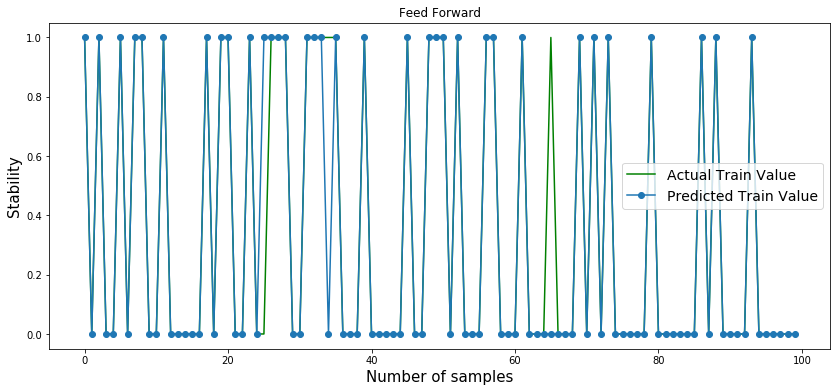

In [240]:
fig = plt.figure(figsize=(14,6))
x = np.arange(100)
plt.plot(x,tar_train[:100],'g-',label='Actual Train Value')
plt.plot(x,y_pred_train1[:100],'o-',label='Predicted Train Value')  
plt.ylabel('Stability',size=15)
plt.xlabel('Number of samples',size=15)
plt.title('Feed Forward')
plt.legend(prop={'size':14})

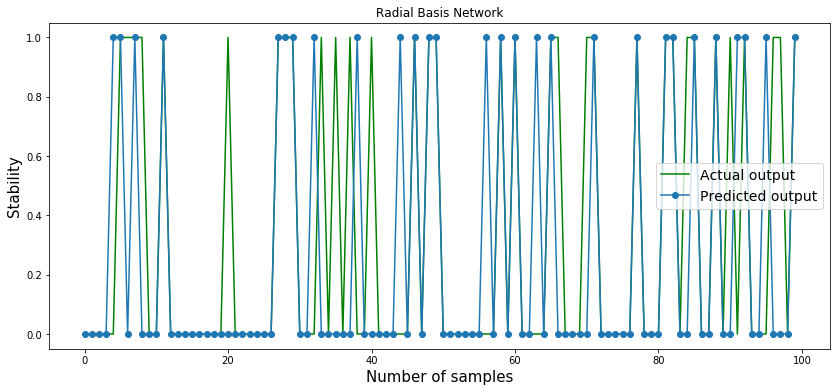

In [241]:
fig = plt.figure(figsize=(14,6))
x = np.arange(100)
plt.plot(x,tar_test[:100],'g-',label='Actual output')
plt.plot(x,y_pred3[:100],'o-',label='Predicted output')  
plt.ylabel('Stability',size=15)
plt.xlabel('Number of samples',size=15)
plt.title('Radial Basis Network')
plt.legend(prop={'size':14})

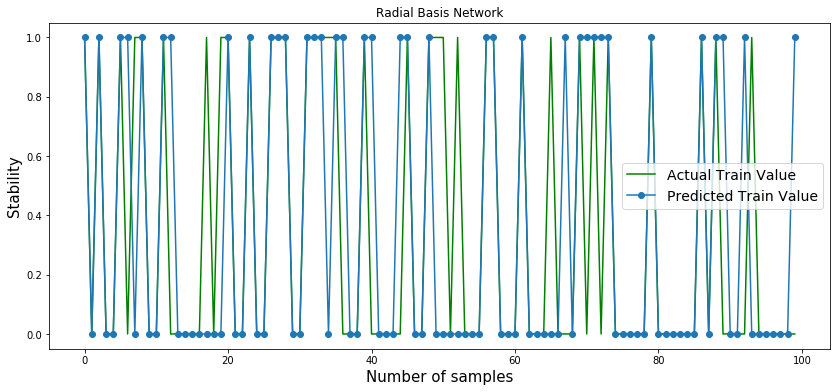

In [242]:
fig = plt.figure(figsize=(14,6))
x = np.arange(100)
plt.plot(x,tar_train[:100],'g-',label='Actual Train Value')
plt.plot(x,y_pred_train3[:100],'o-',label='Predicted Train Value')  
plt.ylabel('Stability',size=15)
plt.xlabel('Number of samples',size=15)
plt.title('Radial Basis Network')
plt.legend(prop={'size':14})

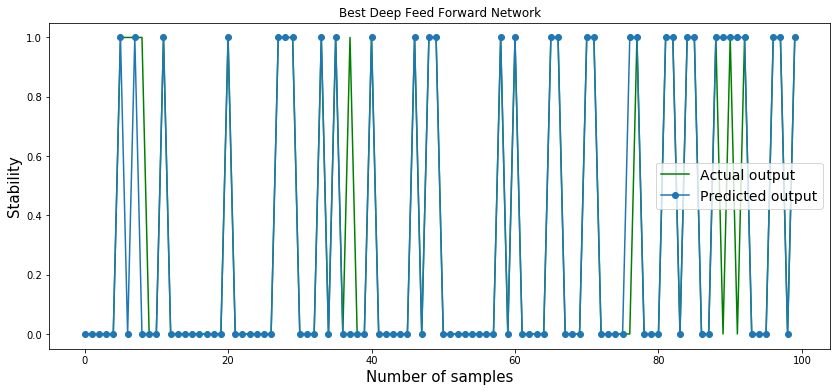

In [244]:
fig = plt.figure(figsize=(14,6))
x = np.arange(100)
plt.plot(x,tar_test[:100],'g-',label='Actual output')
plt.plot(x,y_pred6[:100],'o-',label='Predicted output')  
plt.ylabel('Stability',size=15)
plt.xlabel('Number of samples',size=15)
plt.title('Best Deep Feed Forward Network')
plt.legend(prop={'size':14})

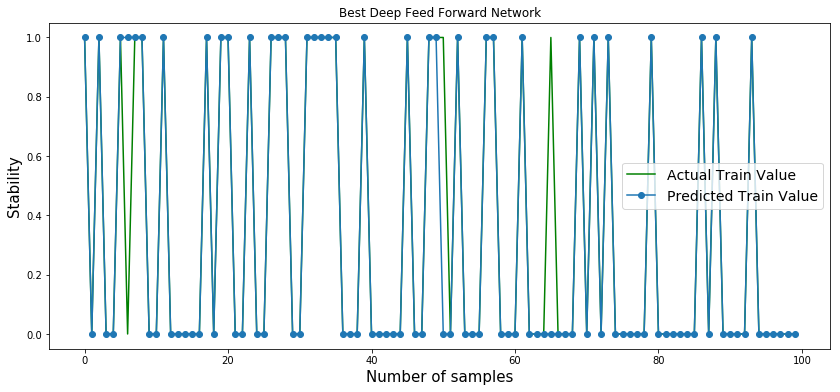

In [245]:
fig = plt.figure(figsize=(14,6))
x = np.arange(100)
plt.plot(x,tar_train[:100],'g-',label='Actual Train Value')
plt.plot(x,y_pred_train6[:100],'o-',label='Predicted Train Value')  
plt.ylabel('Stability',size=15)
plt.xlabel('Number of samples',size=15)
plt.title('Best Deep Feed Forward Network')
plt.legend(prop={'size':14})

### Discussions about the choice of network structures

- If we see the Radial Basis Network model there is not much difference between train and test rmse. So, the model is not overfitting but rmse is very high compared to other models. So, the model is underfitting.
- If we consider Deep Feed Forward model(first model in this type of structure), train rmse is too less and the difference between the test and traion rmse is too high. So, model is overfitting and if it see data which is new it may produce horrible results.
- If we consider Deep Feed Forward model(Second model in this type of structure), train rmse is less and the difference between the test and traion rmse is high and difference reduced compared to above model. So, model is overfitting.
- If we consider Deep Feed Forward model(Third model in this type of structure), train rmse is a bit high and the difference between the test and traion rmse is less. So, model is not overfitting and if it see data which is new it will produce good results.
- If we consider Feed Forward model, train rmse is less and the difference between the test and traion rmse is little bit high. So, model is overfitting a bit.
- So, I will choose Deep Feed Forward model(Third model in this type of structure) rather than the other models.

# Conclusions

Discuss the challenges or somethat that you learned. 
If you have any suggestion about the assignment, you can write about it. 

- From this assignment, I have learnt how to implement different deep learning networks.
- I have learnt how to use libraries TensorFlow and Keras and also how to implement the deep learning techniques using these libraries.
- I have learnt about Feed Forward network and deep Feed Forward networks and the differences between them.
- I have learnt how to implement Radial Basis Network function and also what are the pros and cons of this network.
- I have learnt about different activation functions like relu, sigmoid, tanh, softmax.
- I have learnt about how to evaluate a given model based on the output.
- I have learnt about precision, recall, F-score and confusion matrix.
- I have learnt how a deep learning algorithm like concolutional neural network, autoencoders, Support Vector Machines and different types of Recurrent neural networks like LSTM,GRU work
- I have learnt how to do parameter tunning for the neural network and also about dropping layers in neural network
- I have implemented SVM using sklearn about not able to implement it using either TensorFlow or Keras.

### References

- http://archive.ics.uci.edu/ml/datasets/Electrical+Grid+Stability+Simulated+Data+
- https://nbviewer.jupyter.org/url/webpages.uncc.edu/mlee173/teach/itcs6156/notebooks/notes/Note-Deep%20Learning.ipynb
- https://github.com/PetraVidnerova/rbf_keras
- https://medium.com/datadriveninvestor/building-radial-basis-function-network-with-keras-estimating-survivors-of-titanic-a06c2359c5d9
- https://towardsdatascience.com/deep-learning-feedforward-neural-network-26a6705dbdc7
- https://skymind.ai/wiki/neural-network#concept
- https://towardsdatascience.com/radial-basis-functions-neural-networks-all-we-need-to-know-9a88cc053448

# Extra Credit

- [OPT 1] Test your program with GPUs and compare training speed. You can try [FloydHub](https://www.floydhub.com/) for free 2 hours of GPU resources or MAMBA cluster for this test. 
- [OPT 2] Implement one of neural networks in the chart above and apply it to some real data. 

## Grading

DO NOT forget to submit your data! Your notebook is supposed to run fine after running your codes. 


points | | description
--|--|:--
5 | Overview| states the objective and the appraoch 
15 | Data | 
 | 5| Includes description of your data
 | 5| Plots to visualize data 
 | 5| Reading and analyzing the plots 
50 | Methods | 
 | 30| Explanation of the choice for 3 different neural network structures and reason for the selection. (10 points for each) 
 |   | Relate the choice of your data!
 | 15| Explanation of codes for each structure
 |  5| Explanation of experimental codes
25 | Results | Your Data
| 15| plots for results 
| 10| Discussions about the choice of network structures 
5 | Conclusions 
